<a href="https://colab.research.google.com/github/soroushmirzaei/engineering-industries-projects/blob/main/concrete-compressive-strength-prediction/concrete-compressive-strength-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import mathematics statistics libraries
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning deep learning libraries
import tensorflow as tf
from tensorflow import keras

#install new version 'xlrd' to read excel
!pip install --upgrade xlrd


In [ ]:
#download dataset
!curl -o concrete-compressive-strength.xlsx https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  122k  100  122k    0     0   194k      0 --:--:-- --:--:-- --:--:--  194k


In [ ]:
#load dataset
data = pd.read_excel('/content/concrete-compressive-strength.xlsx')

#rename dataset header
data = data.rename(lambda col : col.lower().split('(')[0].strip(), axis = 1)
data.head()


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
#dataset information
print(f'Dataset Shape:\n{data.shape[0]} Rows {data.shape[1]} Columns\n')
print(f'Dataset Columns:\n{np.array(data.columns)}\n')
print(f'Dataset Columns Type:\n{np.array([(col, dtype) for col, dtype in data.dtypes.to_dict().items()])}')


Dataset Shape:
1030 Rows 9 Columns

Dataset Columns:
['cement' 'blast furnace slag' 'fly ash' 'water' 'superplasticizer'
 'coarse aggregate' 'fine aggregate' 'age' 'concrete compressive strength']

Dataset Columns Type:
[['cement' dtype('float64')]
 ['blast furnace slag' dtype('float64')]
 ['fly ash' dtype('float64')]
 ['water' dtype('float64')]
 ['superplasticizer' dtype('float64')]
 ['coarse aggregate' dtype('float64')]
 ['fine aggregate' dtype('float64')]
 ['age' dtype('int64')]
 ['concrete compressive strength' dtype('float64')]]


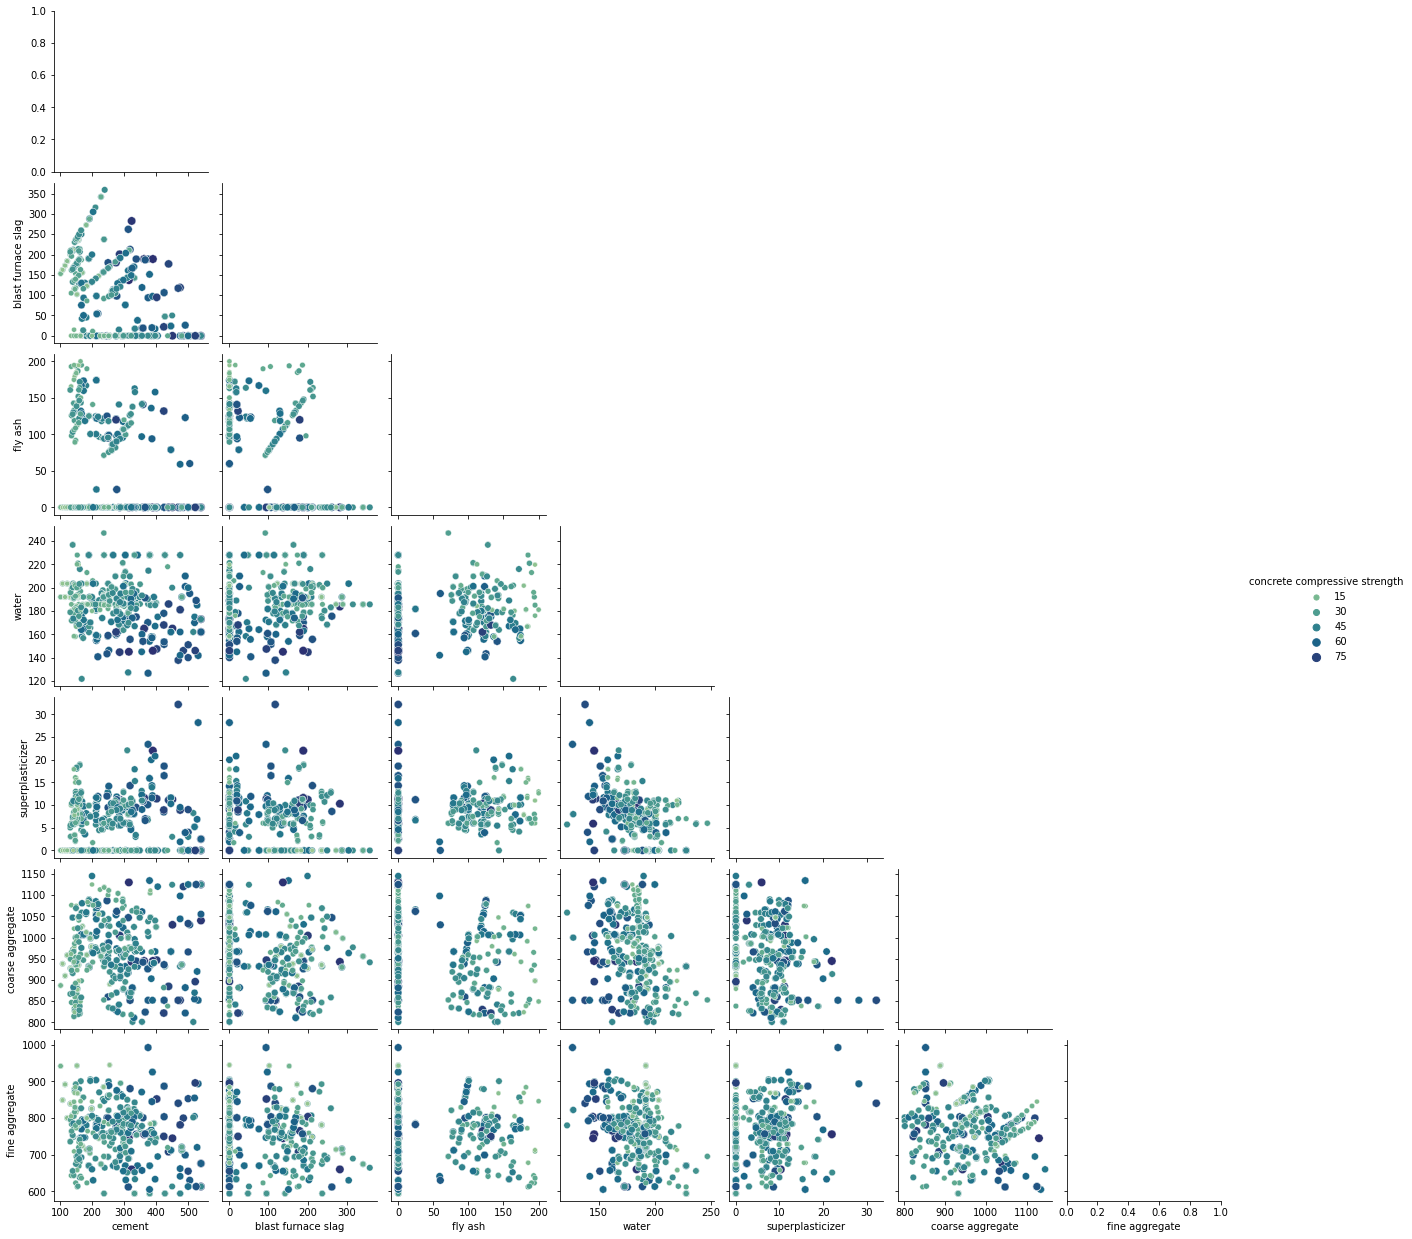

In [ ]:
#draw pairplot based on concrete compressive strength
sns.pairplot(data.select_dtypes('float'), hue = 'concrete compressive strength', corner = True, palette = 'crest',
             kind = 'scatter', diag_kind = 'None', plot_kws = {'size':data['concrete compressive strength']})
plt.show()


In [ ]:
#ingridients ratio
comp_weight = data.iloc[:,:-2].sum(axis = 1)
data.iloc[:,:-2] = data.iloc[:,:-2].divide(comp_weight, axis = 0)

#count of components
data['component'] = data.iloc[:,:-2].gt(0).sum(axis = 1)

#ratio of components
data['water cement ratio'] = data['water'] / data['cement']
data['blast furnace slag cement ratio'] = data['blast furnace slag'] / data['cement']
data['fly ash cement ratio'] = data['fly ash'] / data['cement']
data['superplasticizer cement ratio'] = data['superplasticizer'] / data['cement']

data['coarse aggregate fine aggregate ratio'] = data['coarse aggregate'] / data['fine aggregate']


In [ ]:
#engineered data sample
data.head()


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,concrete compressive strength,component,water cement ratio,blast furnace slag cement ratio,fly ash cement ratio,superplasticizer cement ratio,coarse aggregate fine aggregate ratio
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281,28,79.986111,5,0.300000,0.000000,0.0,0.00463,1.538462
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561,28,61.887366,5,0.300000,0.000000,0.0,0.00463,1.560651
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,270,40.269535,5,0.685714,0.428571,0.0,0.00000,1.569024
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,365,41.052780,5,0.685714,0.428571,0.0,0.00000,1.569024
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764,360,44.296075,5,0.966767,0.666667,0.0,0.00000,1.185221


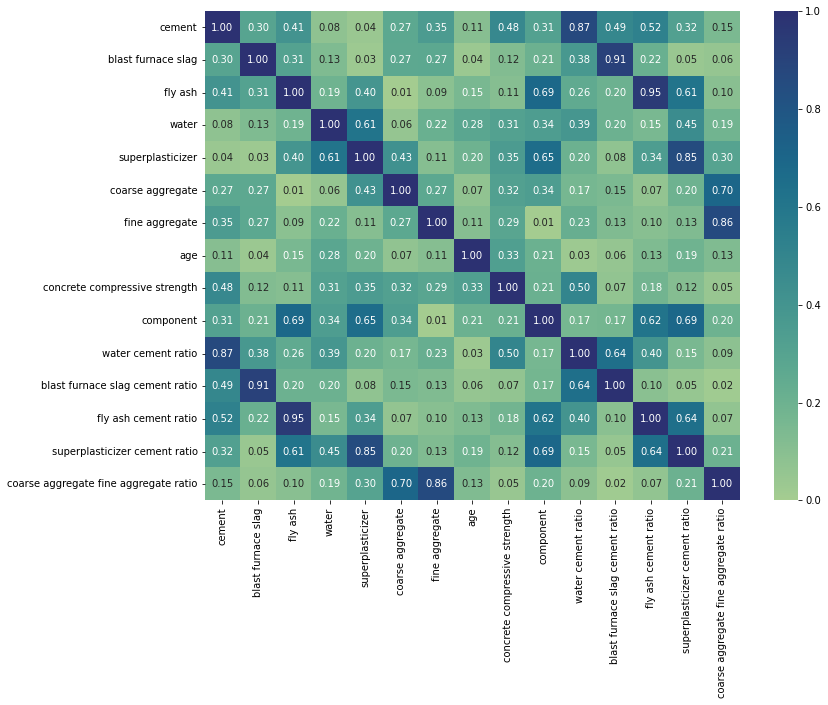

In [ ]:
#draw heatmap of correlation
plt.figure(figsize = (12, 9))
sns.heatmap(data.corr().abs(), cmap = 'crest',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.show()


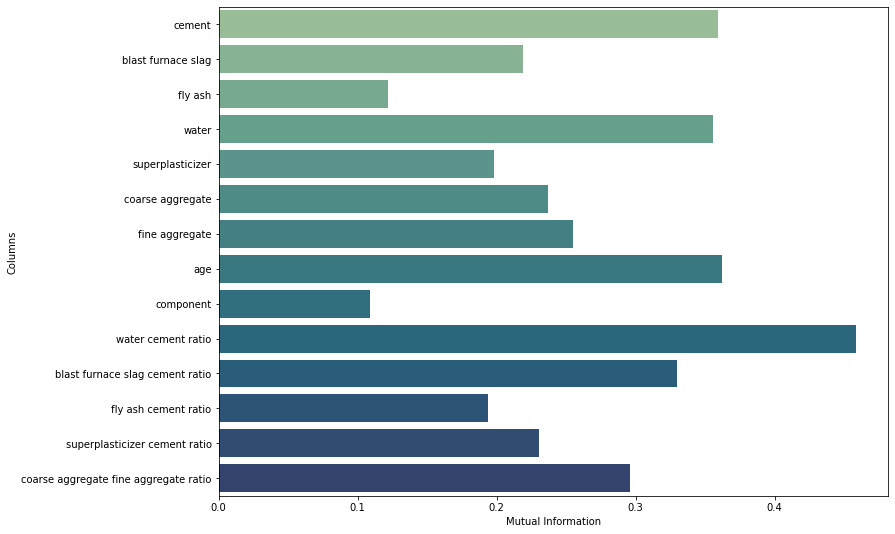

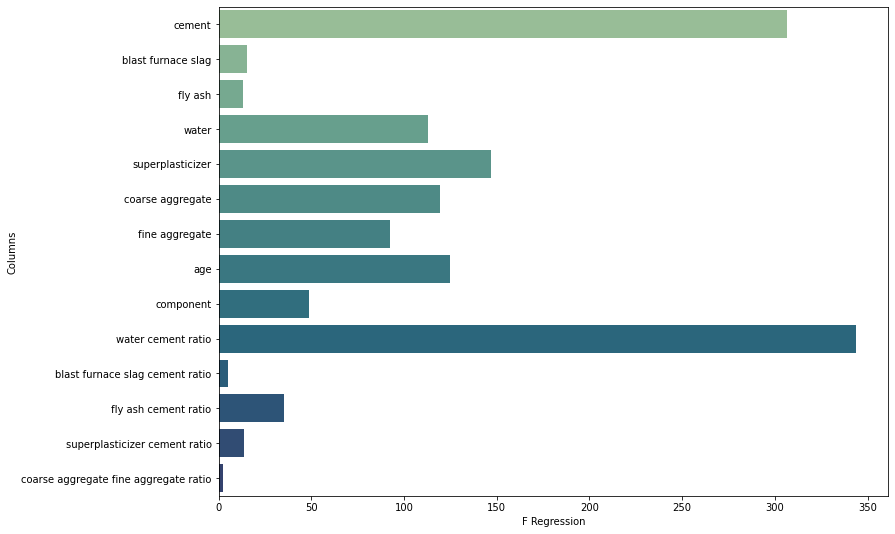

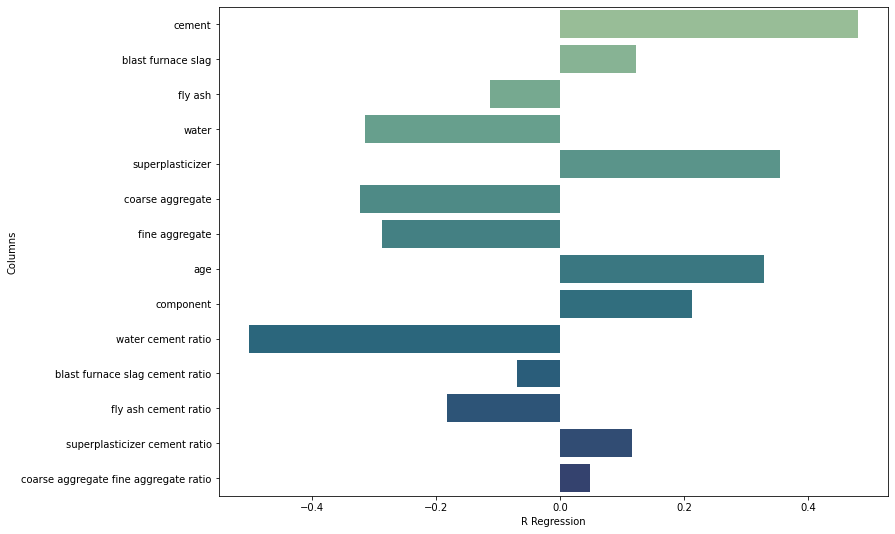

In [ ]:
from sklearn.feature_selection import mutual_info_regression, f_regression, r_regression

plt.figure(figsize = (12, 9))
sns.barplot(y = data.drop('concrete compressive strength', axis = 1).columns,
            x = pd.Series(mutual_info_regression(X = data.drop('concrete compressive strength', axis = 1),
                                                 y = data['concrete compressive strength']),
                          index = data.drop('concrete compressive strength', axis = 1).columns),
            palette = 'crest', orient = 'h')
plt.ylabel('Columns'); plt.xlabel('Mutual Information')
plt.show()

plt.figure(figsize = (12, 9))
sns.barplot(y = data.drop('concrete compressive strength', axis = 1).columns,
            x = pd.Series(f_regression(data.drop('concrete compressive strength', axis = 1),
                                       data['concrete compressive strength'])[0],
                          index = data.drop('concrete compressive strength', axis = 1).columns),
            palette = 'crest', orient = 'h')
plt.ylabel('Columns'); plt.xlabel('F Regression')
plt.show()

plt.figure(figsize = (12, 9))
sns.barplot(y = data.drop('concrete compressive strength', axis = 1).columns,
            x = pd.Series(r_regression(data.drop('concrete compressive strength', axis = 1),
                                       data['concrete compressive strength']),
                          index = data.drop('concrete compressive strength', axis = 1).columns),
            palette = 'crest', orient = 'h')
plt.ylabel('Columns'); plt.xlabel('R Regression')
plt.show()


In [ ]:
#principle component analysis
from sklearn.decomposition import PCA

pca = PCA(random_state = True)
pca_data = pd.DataFrame(pca.fit_transform(data.drop('concrete compressive strength', axis = 1), data['concrete compressive strength']),
                        columns = [f'PCA {col}' for col in data.drop('concrete compressive strength', axis = 1).columns])

pca_target = pd.concat([pca_data, data['concrete compressive strength']], axis = 1)


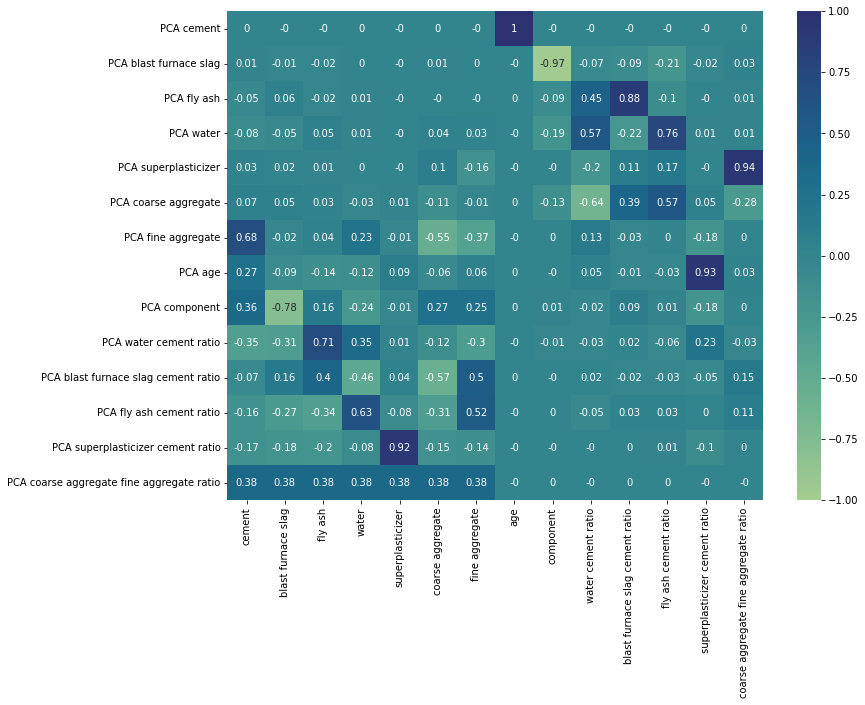

In [ ]:
#plot component heatmap
plt.figure(figsize = (12, 9))
sns.heatmap(pd.DataFrame(pca.components_, columns = [col for col in data.drop('concrete compressive strength', axis = 1).columns],
                         index = [f'PCA {col}' for col in data.drop('concrete compressive strength', axis = 1).columns]).round(2),
            annot = True, vmin = -1, vmax = 1, cmap = 'crest')
plt.show()


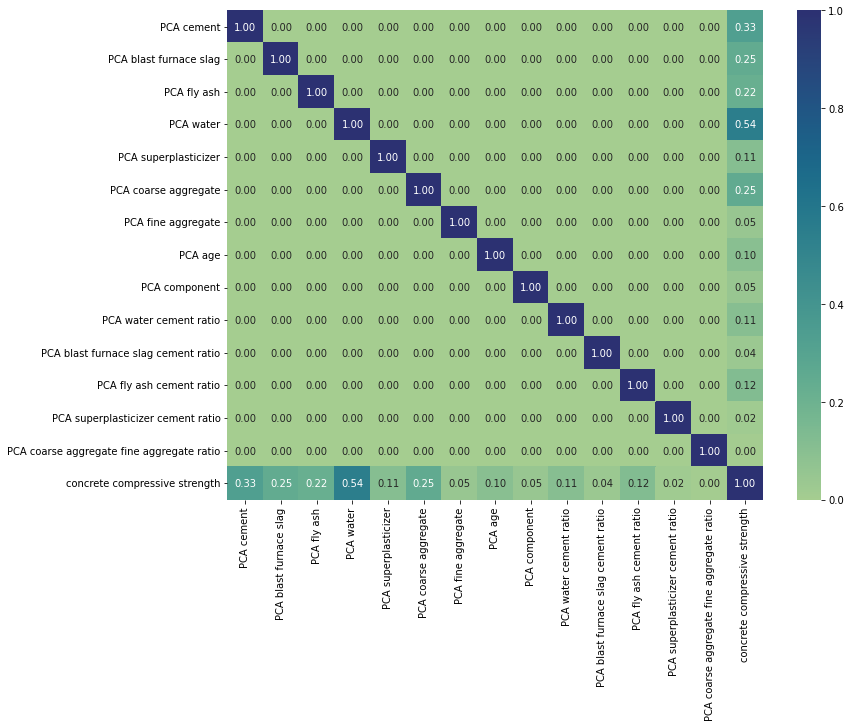

In [ ]:
#draw heatmap of pca target correlation
plt.figure(figsize = (12, 9))
sns.heatmap(pca_target.corr().abs(), cmap = 'crest',
            vmin = 0, vmax = 1, annot = True, fmt = '.2f')
plt.show()


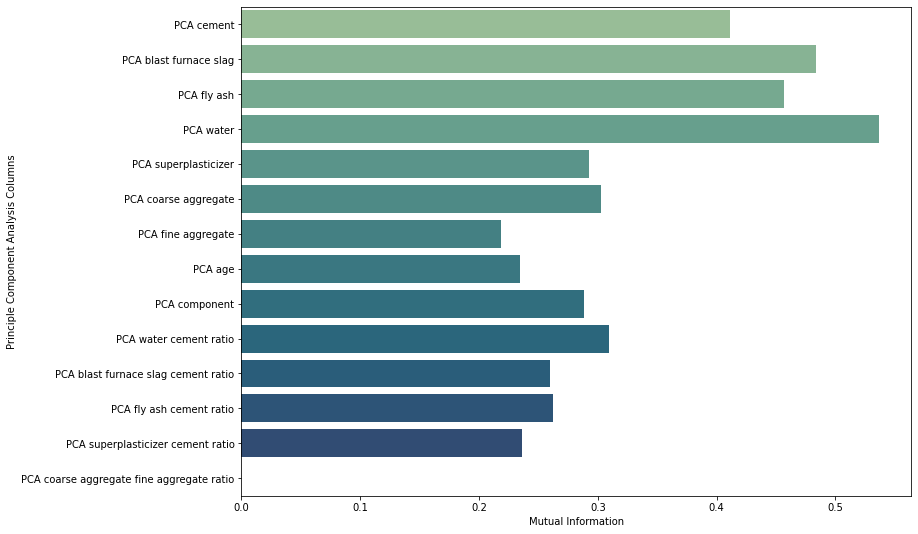

In [ ]:
#calculation of mutual information and feature selection
plt.figure(figsize = (12, 9))
sns.barplot(y = pca_target.iloc[:,:-1].columns,
            x = pd.Series(mutual_info_regression(X = pca_target.iloc[:,:-1], y = pca_target.iloc[:,-1]),
                          index = pca_target.iloc[:,:-1].columns), palette = 'crest', orient = 'h')
plt.ylabel('Principle Component Analysis Columns'); plt.xlabel('Mutual Information')
plt.show()


In [ ]:
#concatenate data and pca data base on info graphic mutual information
data = pd.concat([data, pca_data[['PCA cement', 'PCA blast furnace slag', 'PCA fly ash', 'PCA water']]], axis = 1)

#sample of data
data.head()


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,concrete compressive strength,component,water cement ratio,blast furnace slag cement ratio,fly ash cement ratio,superplasticizer cement ratio,coarse aggregate fine aggregate ratio,PCA cement,PCA blast furnace slag,PCA fly ash,PCA water
0,0.223094,0.00000,0.0,0.066928,0.001033,0.429663,0.279281,28,79.986111,5,0.300000,0.000000,0.0,0.00463,1.538462,-17.659351,0.801872,-0.426488,-0.260266
1,0.221720,0.00000,0.0,0.066516,0.001026,0.433176,0.277561,28,61.887366,5,0.300000,0.000000,0.0,0.00463,1.560651,-17.659342,0.802588,-0.426113,-0.259899
2,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,270,40.269535,5,0.685714,0.428571,0.0,0.00000,1.569024,224.338894,-0.120836,0.141294,-0.157724
3,0.149170,0.06393,0.0,0.102288,0.000000,0.418125,0.266487,365,41.052780,5,0.685714,0.428571,0.0,0.00000,1.569024,319.338294,-0.457150,0.144895,-0.166481
4,0.085350,0.05690,0.0,0.082513,0.000000,0.420474,0.354764,360,44.296075,5,0.966767,0.666667,0.0,0.00000,1.185221,314.338027,-0.493500,0.477497,-0.055716


In [ ]:
#split dataset for train and valid
from sklearn.model_selection import train_test_split
inp_tn, inp_ts, out_tn, out_ts = train_test_split(data.drop('concrete compressive strength', axis = 1),
                                                  data['concrete compressive strength'],
                                                  train_size = 0.9, random_state = True)


In [ ]:
#train dataset before pre-processing
inp_tn.head()


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,component,water cement ratio,blast furnace slag cement ratio,fly ash cement ratio,superplasticizer cement ratio,coarse aggregate fine aggregate ratio,PCA cement,PCA blast furnace slag,PCA fly ash,PCA water
90,0.159318,0.077228,0.000000,0.059617,0.008989,0.386017,0.308830,3,6,0.374199,0.484740,0.000000,0.056425,1.249934,-42.662956,-0.140036,-0.057583,-0.513313
711,0.132239,0.088145,0.000000,0.088145,0.000000,0.418157,0.273314,90,5,0.666557,0.666557,0.000000,0.000000,1.529952,44.339917,0.494516,0.336234,-0.205163
675,0.081042,0.054028,0.000000,0.089679,0.000000,0.422704,0.352547,90,5,1.106580,0.666667,0.000000,0.000000,1.199000,44.339717,0.453081,0.530789,0.048906
241,0.098367,0.000000,0.050605,0.083613,0.002625,0.440313,0.324477,28,6,0.850009,0.000000,0.514455,0.026689,1.356995,-17.663317,-0.323688,-0.319768,0.268096
698,0.088260,0.132411,0.000000,0.088260,0.000000,0.417834,0.273236,28,5,1.000000,1.500246,0.000000,0.000000,1.529206,-17.660091,0.614596,1.221139,-0.195740


In [ ]:
#normalization dataset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

norm_cls_trns = ColumnTransformer([('std_scl', StandardScaler(), inp_tn.columns)],
                                  remainder = 'passthrough')

inp_tn = pd.DataFrame(norm_cls_trns.fit_transform(inp_tn), columns = data.drop('concrete compressive strength', axis = 1).columns,
                      index = inp_tn.index)
inp_ts = pd.DataFrame(norm_cls_trns.transform(inp_ts), columns = data.drop('concrete compressive strength', axis = 1).columns,
                      index = inp_ts.index)


In [ ]:
#train dataset after pre-processing
inp_tn.head()


,cement,blast furnace slag,fly ash,water,superplasticizer,coarse aggregate,fine aggregate,age,component,water cement ratio,blast furnace slag cement ratio,fly ash cement ratio,superplasticizer cement ratio,coarse aggregate fine aggregate ratio,PCA cement,PCA blast furnace slag,PCA fly ash,PCA water
90,0.921856,1.240977,-0.835646,-1.682676,2.582435,-0.941936,-0.669697,-0.688731,0.378856,-1.190946,0.296189,-0.742282,1.329943,-0.109911,-0.688742,-0.158678,-0.115173,-1.603025
711,0.296821,1.535736,-0.835646,0.961986,-1.039075,0.099048,-1.746058,0.739651,-0.583335,-0.267640,0.682787,-0.742282,-1.012698,1.426806,0.739678,0.448005,0.647688,-0.650329
675,-0.884883,0.614566,-0.835646,1.104225,-1.039075,0.246308,0.655201,0.739651,-0.583335,1.122005,0.683019,-0.742282,-1.012698,-0.389431,0.739675,0.408389,1.024558,0.135170
241,-0.484993,-0.844203,1.004557,0.541848,0.018572,0.816643,-0.195514,-0.278277,0.378856,0.311722,-0.734509,0.743314,0.095389,0.477630,-0.278296,-0.334264,-0.623049,0.812831
698,-0.718287,2.730937,-0.835646,0.972618,-1.039075,0.088576,-1.748425,-0.278277,-0.583335,0.785414,2.455452,-0.742282,-1.012698,1.422711,-0.278243,0.562811,2.361829,-0.621196


In [ ]:
#define model
input = keras.layers.Input(shape = (len(data.columns) - 1), name = 'input_layer')
out = input

#define hidden layers
dense_units = [256, 256, 128, 128]

for layer_num in range(len(dense_units)):
    out = keras.layers.Dense(dense_units[layer_num], 'relu', name = f'dense_{layer_num}')(out)

#define output layers
output = keras.layers.Dense(1, name = 'output_layer')(out)

#define model object
model = keras.models.Model(inputs = [input],
                           outputs = [output])


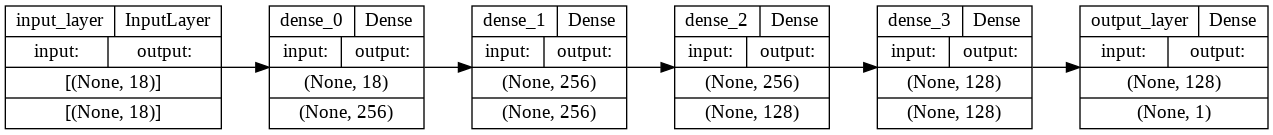

In [ ]:
#plot model
keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, rankdir = 'LR')


In [ ]:
#model summary
model.summary(130)


Model: "model"
__________________________________________________________________________________________________________________________________
 Layer (type)                                             Output Shape                                        Param #             
 input_layer (InputLayer)                                 [(None, 18)]                                        0                   
                                                                                                                                  
 dense_0 (Dense)                                          (None, 256)                                         4864                
                                                                                                                                  
 dense_1 (Dense)                                          (None, 256)                                         65792               
                                                                    

In [ ]:
#compile and fit model
model.compile(optimizer = keras.optimizers.Adam(),
              loss = keras.losses.Huber(),
              metrics = keras.metrics.MeanAbsoluteError())

history = model.fit(x = inp_tn, y = out_tn, epochs = 10000, verbose = 0,
                    validation_data = (inp_ts, out_ts))


In [ ]:
#plot model history
history = pd.DataFrame(history.history)
train_hist_col = [col for col in history.columns if not col.startswith('val')]
valid_hist_col = [col for col in history.columns if col.startswith('val')]


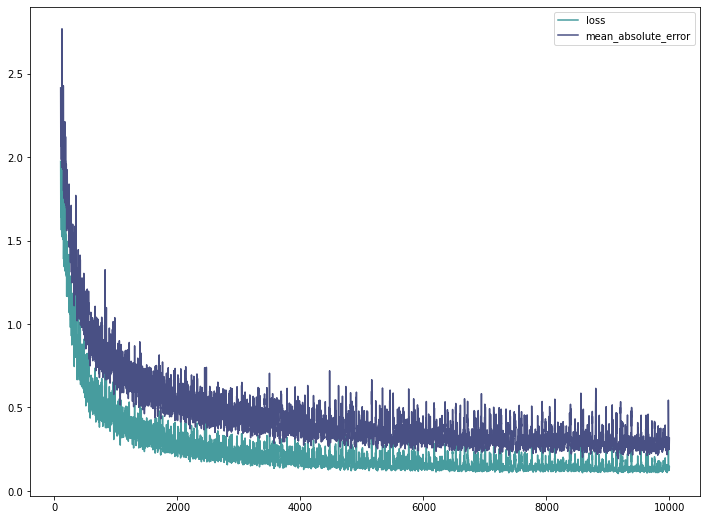

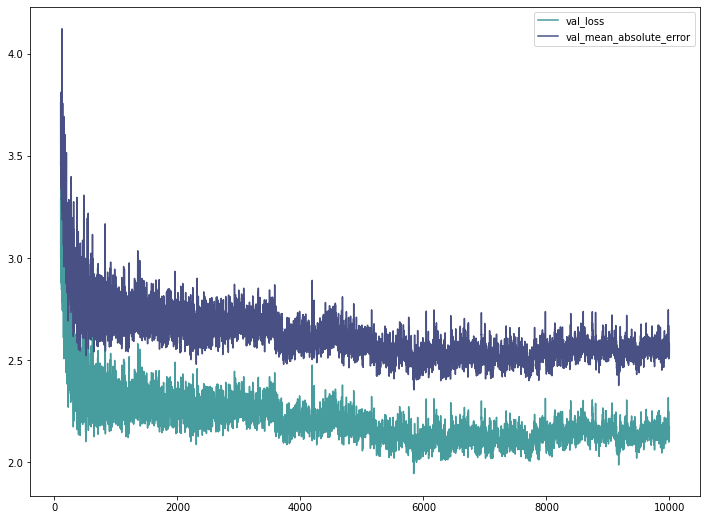

In [ ]:
history[train_hist_col][100:].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.show()

history[valid_hist_col][100:].plot(figsize = (12, 9), color = ['#479c9e', '#495084'])
plt.show()


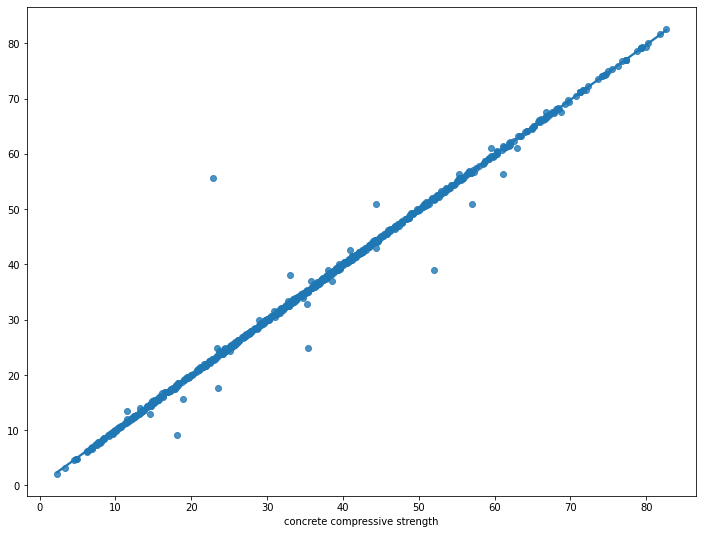

slope & intercept
(0.9958761628007851, 0.07832613024462631)


In [ ]:
#plot and calculate slope and intercept for training set and its prediction
from scipy.stats import linregress

train_pred = model.predict(inp_tn)

plt.figure(figsize = (12, 9))
sns.regplot(x = out_tn, y = train_pred.flatten())
plt.show()

print('slope & intercept')
print(linregress(out_tn.values.flatten(), train_pred.flatten())[:2])


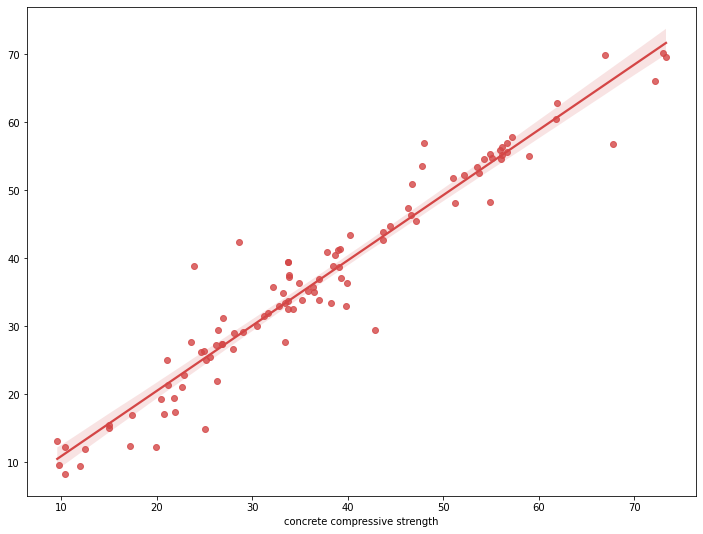

slope & intercept
(0.958811746732511, 1.3470983830916978)


In [ ]:
#plot and calculate slope and intercept for validation set and its prediction
valid_pred = model.predict(inp_ts)

plt.figure(figsize = (12, 9))
sns.regplot(x = out_ts, y = valid_pred.flatten(), color = '#d44646')
plt.show()

print('slope & intercept')
print(linregress(out_ts.values.flatten(), valid_pred.flatten())[:2])


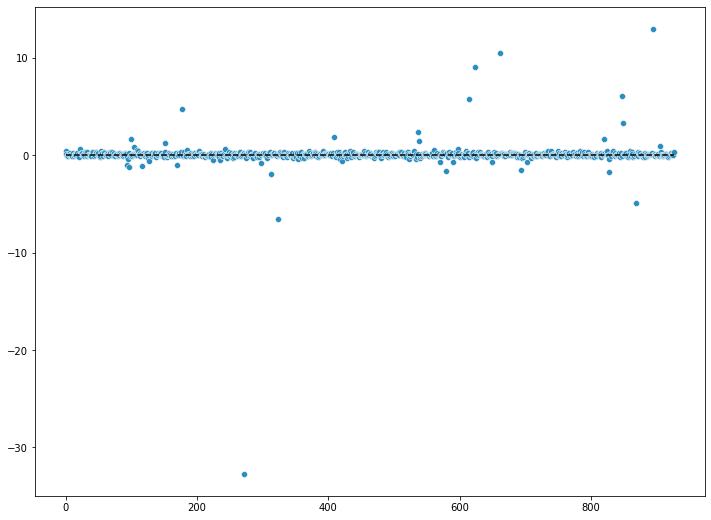

In [ ]:
#plot differ for training set
train_differ = out_tn.values.flatten() - train_pred.flatten()

plt.figure(figsize = (12, 9))
sns.scatterplot(data = train_differ, color = '#2c8ebf')
plt.hlines(0, 0, len(out_tn), linestyle = '--')
plt.show()


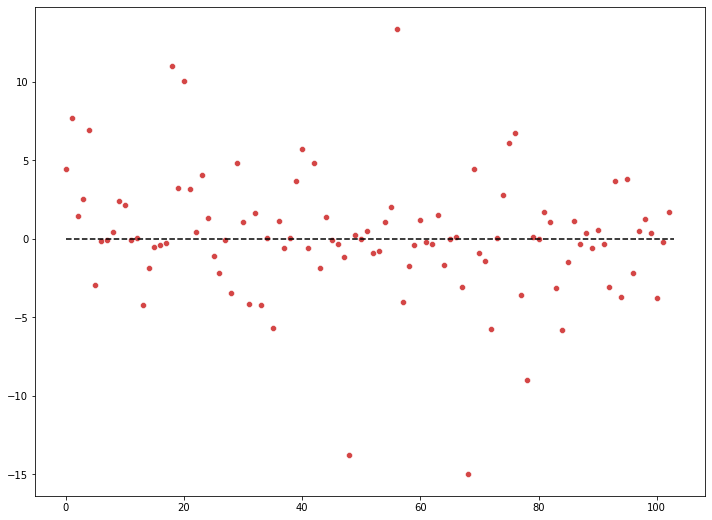

In [ ]:
#plot differ for validation set
valid_differ = out_ts.values.flatten() - valid_pred.flatten()

plt.figure(figsize = (12, 9))
sns.scatterplot(data = valid_differ, color = '#d44646')
plt.hlines(0, 0, len(out_ts), linestyle = '--')
plt.show()


In [ ]:
#model evaluation
train_eval = model.evaluate(inp_tn, out_tn, verbose = 0, return_dict = True)
valid_eval = model.evaluate(inp_ts, out_ts, verbose = 0, return_dict = True)

print('training evaluation:')
for metric in train_eval:
    print(f'\t{metric}: {train_eval[metric]:.4f}')

print('validation evaluation:')
for metric in valid_eval:
    print(f'\t{metric}: {valid_eval[metric]:.4f}')

training evaluation:
	loss: 0.1302
	mean_absolute_error: 0.2570
validation evaluation:
	loss: 2.1729
	mean_absolute_error: 2.5762
